# TP Cars

Sources et data : 
https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes

L'objectif de ce TP est de travailler sur un "Dataset" un peu plus gros et de regarder un problème de régression et non plus de Calssification.

## Analyser les données

Quelles sont les données manquantes quel choix faites vous des différentes variables proposées.

Faire un encodage des variables qualitative.

Tracer la matrice de corélation de vos variables.

Que pouvez vous dire a priori de vos données.

In [25]:
# Importer the data
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time

# Load data
filenames =["audi","bmw","cclass","focus","ford","hyundi","merc","skoda","toyota","unclean cclass","unclean focus","vauxhall","vw"]

data = {}

for i in filenames :
    data[i] = pd.read_csv(i+".xls", header=None)

In [26]:
vw = data['vw']   #data[vw] is wrong
print(vw.shape)
# print(vw.head())
# print(vw.describe)
# vw.info the same function as vw.describe
#enlever le premier rang because it has already been used as column names.
vw

(15158, 9)


,0,1,2,3,4,5,6,7,8
0,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
2,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
3,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
4,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
...,...,...,...,...,...,...,...,...,...
15153,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15154,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15155,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15156,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


# Une amélioration pour organiser les noms de colonnes des données

In [27]:
# Set the column names to the values of the first row.
vw.columns = vw.iloc[0]  
vw.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object', name=0)

In [28]:
#enlever le premier rang because it has already been used as column names.
vw = vw[1:]  #on constate que le nb de rows deviens de 15158 à 15157
vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
2,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
3,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
4,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
5,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15153,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15154,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15155,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15156,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


#  Les données manquantes

In [29]:
# valeur manquante
# vw.isnull().sum()                   the same as isna
missing_data = vw.isna().sum()
print(f"missing_data: {missing_data}")

missing_data: 0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [30]:
# Drop columns with any missing data
# vw = vw.dropna(axis=1, inplace=True) #comme rien de manquer, rien à faire 

# Encodage et corrélation

In [31]:
from sklearn.preprocessing import LabelEncoder
# On encode la target par LabelEncoder, car l'on ne souhaite qu'un scalaire en sortie et non un vecteur, 
# pour les besoins des graphes

la = LabelEncoder()
df = pd.DataFrame(vw)   # Conversion des données en DataFrame 

# for i in df.columns:      Encoder tout donc pas souhaitable
#     df[i] = la.fit_transform(df[i])
for column in df.columns:
     if df[column].dtype == 'object':  # Encoder seulement les colonnes de type objet (catégorielles)
        df[column] = la.fit_transform(df[column])

In [32]:
df   # Encoding the data, excluding the headers

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1,21,19,2406,0,1215,0,5,59,8
2,21,19,2552,0,7631,0,5,59,8
3,21,19,1785,1,9761,0,5,60,8
4,21,19,2935,0,7947,3,5,24,8
5,21,19,2175,2,9271,3,6,41,4
...,...,...,...,...,...,...,...,...,...
15153,10,12,3313,1,9754,0,2,69,8
15154,11,8,1440,1,10337,3,5,52,2
15155,11,9,1082,1,9546,3,14,45,3
15156,11,6,498,1,10121,3,6,52,2


In [33]:
cor=df.corr(method="pearson")    #cor = df.corr() 
correlation_price = cor['price'].sort_values(ascending = False)
correlation_price

0
price           1.000000
model           0.169099
mileage         0.105879
engineSize      0.046433
fuelType        0.003821
transmission   -0.022997
tax            -0.026918
year           -0.090350
mpg            -0.164560
Name: price, dtype: float64

<Axes: xlabel='0', ylabel='0'>

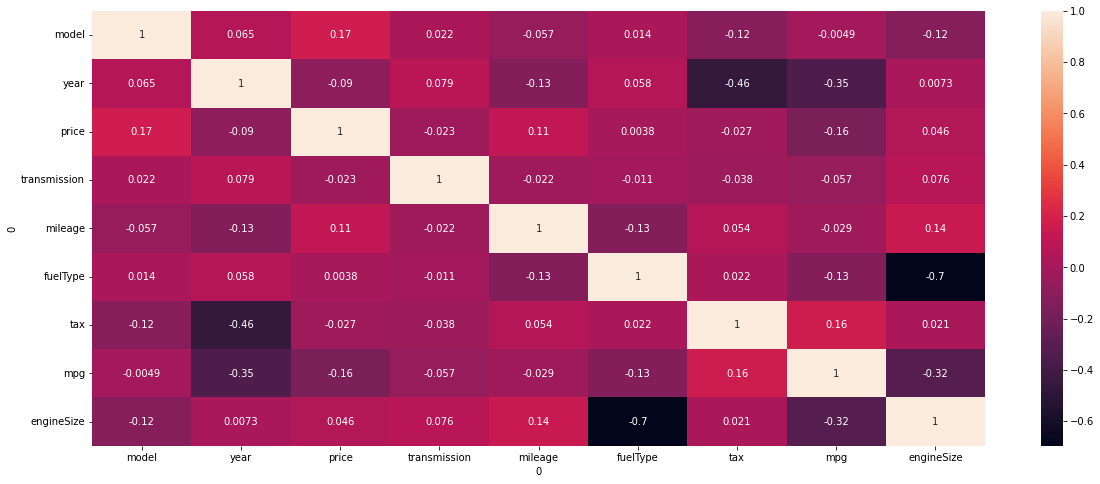

In [34]:
import seaborn as sns

plt.figure(figsize=(20,8))
sns.heatmap(cor,annot= True)

In [35]:
cor

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,,,,,,,,,
model,1.000000,0.064749,0.169099,0.021625,-0.056772,0.014208,-0.119198,-0.004872,-0.122617
year,0.064749,1.000000,-0.090350,0.078827,-0.130377,0.058071,-0.459342,-0.349147,0.007337
price,0.169099,-0.090350,1.000000,-0.022997,0.105879,0.003821,-0.026918,-0.164560,0.046433
transmission,0.021625,0.078827,-0.022997,1.000000,-0.021980,-0.011222,-0.037592,-0.056601,0.076025
mileage,-0.056772,-0.130377,0.105879,-0.021980,1.000000,-0.129122,0.053940,-0.028851,0.143557
fuelType,0.014208,0.058071,0.003821,-0.011222,-0.129122,1.000000,0.022011,-0.130852,-0.696649
tax,-0.119198,-0.459342,-0.026918,-0.037592,0.053940,0.022011,1.000000,0.161327,0.020960
mpg,-0.004872,-0.349147,-0.164560,-0.056601,-0.028851,-0.130852,0.161327,1.000000,-0.316453
engineSize,-0.122617,0.007337,0.046433,0.076025,0.143557,-0.696649,0.020960,-0.316453,1.000000


In [36]:
df.iloc[:, 2]   #column price

1        2406
2        2552
3        1785
4        2935
5        2175
         ... 
15153    3313
15154    1440
15155    1082
15156     498
15157    2180
Name: price, Length: 15157, dtype: int64

Selecting the column with price,  for linear regression neural network analysis. 

## Modèle de régression

Mettre en place un réseau de neurone qui prédit l'estimation du prix de la voiture. On pourra utiliser la fonction Loss de type moindre carré et également une métrique $R^2$ pour obtenir le score du modèle.

Mettre en place une stratégie pour garantir de ne pas faire de surapprentissage.

Analyser vos résultats, tracer la courbe de points de coordonné (Prix de l'annonce, Prix prédit) et possiblement par sous catégories.

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping       #une stratégie pour garantir de ne pas faire de surapprentissage.

y = df.iloc[:, 2].values
X = df.iloc[:, 1:].values

imputer = SimpleImputer(strategy='mean') 
scaler = StandardScaler()

X_imputed = imputer.fit_transform(X)
X_scaled = scaler.fit_transform(X_imputed)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(30, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(x_train, y_train, validation_split=0.2, epochs=150, batch_size=50, callbacks=[early_stopping], verbose=0)


In [38]:
from sklearn.metrics import r2_score

predicted_prices = model.predict(x_test)
print("Test Loss:", model.evaluate(x_test, y_test))
print("R-squared:", r2_score(y_test, predicted_prices.flatten()))

95/95 [==============================] - 0s 2ms/step - loss: 355.8734
Test Loss: 355.87335205078125
R-squared: 0.9997503914559261


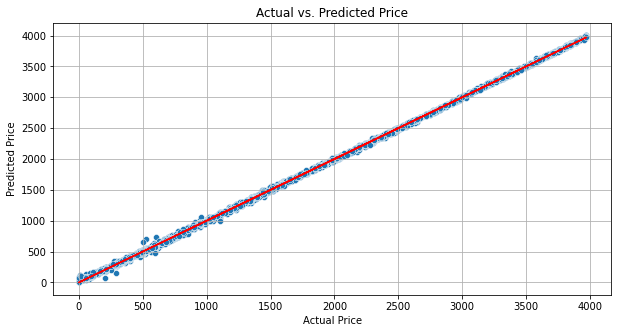

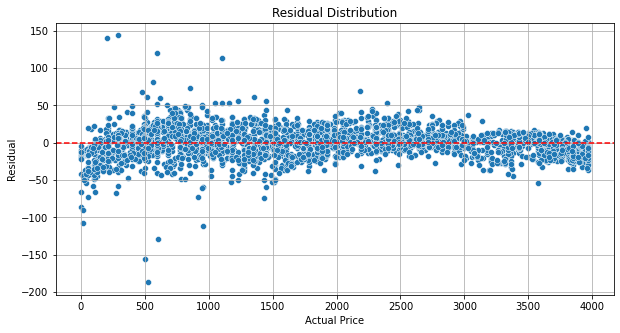

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=predicted_prices.flatten())
plt.plot(y_test, y_test, color='red')  
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
residuals = y_test - predicted_prices.flatten()
sns.scatterplot(x=y_test, y=residuals)
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.axhline(y=0, color='red', linestyle='--')  
plt.title('Residual Distribution')
plt.grid(True)
plt.show()